# Introduction to tensorflow

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
import tensorflow as tf

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


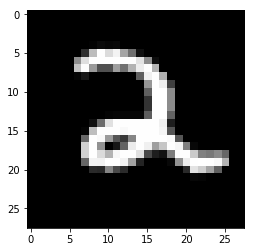

In [37]:
%matplotlib inline 
import matplotlib.pyplot as plt
batch_xs, batch_ys = mnist.train.next_batch(1)
X = batch_xs
X = X.reshape([28,28]) # the dataset is 28X28
plt.gray()
print(batch_ys)
plt.imshow(X)

### Tensorflow Placeholder

In [7]:
x = tf.placeholder(tf.float32,[None,784]) #placeholder takes training vectors - images, with 784 elements


Now creating tensorflow variable. A variable which would be tweaked.
__*A variable is something Tensorflow retrieve during training, whereas the placeholder is meant to keep training data. In addition, a variable can be saved to disk during and after training for check pointing and model transfer.*__ 


So weight matrix W with 784 weights on one axis. Just one for each element of X, and we do it 10 times. Since you are basically running 10 soft mix regression motors in parallel, one for each possible digit. 

In [11]:
W = tf.Variable(tf.zeros([784,10]))

Finally, we create a __bias__ that draw one for each soft next regression model. 

In [12]:
b = tf.Variable(tf.zeros([10]))

Now creating the actual model. No computation is happening at this stage. Hooking up the nodes together to form a computation graph

In [13]:
y = tf.nn.softmax(tf.matmul(x,W)+b)

In [14]:
y_ = tf.placeholder(tf.float32,[None,10])

Choosing cross entropy error function. It is given by $$

In [19]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_* tf.log(y),reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [20]:
sess = tf.InteractiveSession()

In [22]:
tf.global_variables_initializer().run()

In [29]:
for _ in range(100):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x: batch_xs, y_: batch_ys})

In [30]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [33]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [35]:
print(sess.run(accuracy,feed_dict={x : mnist.test.images,y_:mnist.test.labels}))

0.9039
